In [3]:
from sklearn.utils import shuffle
from sklearn.datasets import make_blobs
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix

# demonstration of calculating metrics for a neural network model using sklearn
from sklearn.datasets import make_circles
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
import pandas as pd
import numpy as np
import os
import sys



In [4]:
class Classify:

    # Initializer / Instance Attributes
    def __init__(self):
        self.models = list()
        self.train_mean = 0 
        self.train_std = 0


    # create a list of base-models
    def get_models(self):
        self.models.append(LogisticRegression(solver='liblinear'))
        self.models.append(DecisionTreeClassifier())
        self.models.append(GaussianNB())
        self.models.append(KNeighborsClassifier())
        self.models.append(ExtraTreesClassifier(n_estimators=10))
        self.models.append(RandomForestClassifier(n_estimators=500, verbose=1, n_jobs=-1))


    def create_dataset(self, filename):
        sys.path.append(os.getcwd() + '/' + filename )  
        path = sys.path[-1]
        dataset = pd.read_csv(path, sep=',', header=0)
         
        # X, y = make_blobs(n_samples=1000, centers=3, n_features=2, random_state=0)
   
        X = dataset.iloc[:, 1:-1].values
        y = dataset.iloc[:, -1]
        dataset = shuffle(dataset)
        dataset = dataset.reset_index()
        del dataset['index']


        print(dataset.dtypes)
        print("Lenght: ", len(dataset))

        return X, y, dataset


    def pre_processing(self, features, labels, train):

      if train == 1:
        #------------------------------------------------------------------------------------------------
        # get per-feature statistics (mean, standard deviation) from the training set to normalize by
        self.train_mean = np.nanmean(features, axis=0)
        self.train_std = np.nanstd(features, axis=0)

      features = (features - self.train_mean) / self.train_std      

      # organize train labels and merge with train features 
      labels = labels.reset_index()
      del labels['index']

      df = pd.DataFrame(features)
      df["label"] = labels

      # Drop Nan values 
      df = df.dropna()
        
      df = df.reset_index()
      del df['index']

      #------------------------------------------------------------------------------------------------
      features = df.iloc[:, 0:-1].values
      labels = df.iloc[:, -1]

      return features, labels


    # collect out of fold predictions form k-fold cross validation
    def get_out_of_fold_predictions(self, train_X, train_y, test_X):
      # fit and make predictions with each sub-model
      for model in self.models:
        model.fit(train_X, train_y)



    # evaluate a list of models on a dataset
    def evaluate_models_old(self, X, y):
      result = list()
      for model in self.models:
          yhat = model.predict(X)
          acc = accuracy_score(y, yhat)
          result.append('%s: %.3f' % (model.__class__.__name__, acc*100))
      return result



        # evaluate a list of models on a dataset
    def evaluate_models(self, X, y):
      result = list()
      for model in self.models:
          yhat = model.predict(X)
          acc = accuracy_score(y, yhat)

          # accuracy: (tp + tn) / (p + n)
          accuracy = accuracy_score(y, yhat)
          
          # precision tp / (tp + fp)
          precision = precision_score(y, yhat)

          # recall: tp / (tp + fn)
          recall = recall_score(y, yhat)
          
          # f1: 2 tp / (2 tp + fp + fn)
          f1 = f1_score(y, yhat)
          
          # kappa
          kappa = cohen_kappa_score(y, yhat)

          # ROC AUC
          auc = roc_auc_score(y, yhat)

          # confusion matrix
          matrix = confusion_matrix(y, yhat)
          print('%s: ' % (model.__class__.__name__))
          print(matrix)
          plot_confusion_matrix(model, X, y)  
          plt.show()

          result.append('%s: ' % (model.__class__.__name__) + '\n' +
                        'Accuracy: %f' % accuracy + '\n' +
                        'Precision: %f' % precision + '\n' +
                        'Recall: %f' % recall + '\n' +
                        'F1 score: %f' % f1 + '\n' +
                       'Cohens kappa: %f' % kappa + '\n' +
                       'ROC AUC: %f' % auc + '\n')
      return result



    def main(self, filename):
      # create the inputs and outputs
      X, y, dataset = self.create_dataset(filename)

      # split
      train_features, test_features, train_labels, test_labels = train_test_split(X, y, test_size=0.30)
      print('Train', train_features.shape, train_labels.shape, 'Test', test_features.shape, test_labels.shape)

      #------------------------------------------------------------------------------------------------
      train_features, train_labels  = self.pre_processing(train_features, train_labels, 1)
      test_features, test_labels    = self.pre_processing(test_features, test_labels, 0 )

      # get models
      self.get_models()

      # get out of fold predictions
      self.get_out_of_fold_predictions(train_features, train_labels, test_features)
    

      # evaluate base models
      result = self.evaluate_models(test_features, test_labels)
      print("MODEL RESULTS: ")
      for item in result:
          print(item)

    def make_prediction(self, filename):
      # create the inputs and outputs
      test_features, test_labels, dataset = self.create_dataset(filename)
      print('Test', test_features.shape, test_labels.shape)

      #------------------------------------------------------------------------------------------------
      test_features, test_labels = self.pre_processing(test_features, test_labels, 0 )

      # evaluate base models
      result = self.evaluate_models(test_features, test_labels)
      print("MODEL RESULTS: ")
      for item in result:
          print(item)





In [6]:
mn = Classify()
filename = 'df_result_full.csv'

X, y, dataset = mn.create_dataset(filename)

dataset

icao24            int64
time              int64
lat             float64
lon             float64
heading         float64
velocity        float64
baroaltitude    float64
geoaltitude     float64
label             int64
dtype: object
Lenght:  53110


,icao24,time,lat,lon,heading,velocity,baroaltitude,geoaltitude,label
0,161,1638826820,38.823486,28.083443,264.822290,159.614490,3909.06,4000.50,1
1,98,1638829550,40.244168,32.855730,114.839939,239.067413,10668.00,10828.02,0
2,133,1638824540,40.443420,29.870890,30.416285,212.370683,4396.74,4495.80,1
3,10,1638832460,40.628998,35.266785,106.536534,260.270535,11887.20,12016.74,1
4,120,1638824480,36.223447,28.686876,299.025606,195.152243,10980.42,11132.82,0
...,...,...,...,...,...,...,...,...,...
53105,94,1638828650,41.187186,31.802798,100.346683,252.060761,10187.94,10287.00,1
53106,28,1638834420,37.570416,29.569259,155.511690,215.315314,11269.98,11407.14,0
53107,18,1638833580,40.602120,35.661447,123.940007,256.236078,11879.58,12016.74,0
53108,15,1638831810,41.831515,29.297471,122.072569,232.520152,11887.20,11871.96,1


Train (37177, 7) (37177,) Test (15933, 7) (15933,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    5.6s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:   12.1s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:   13.6s finished


LogisticRegression: 
[[4652 3237]
 [3152 4892]]


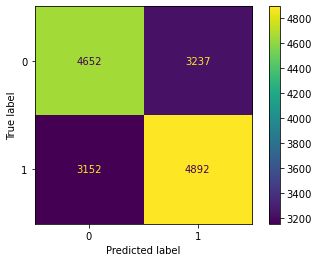

DecisionTreeClassifier: 
[[7751  138]
 [ 108 7936]]


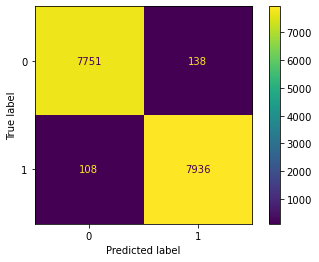

GaussianNB: 
[[3662 4227]
 [3046 4998]]


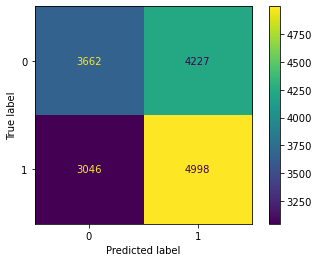

KNeighborsClassifier: 
[[7779  110]
 [  92 7952]]


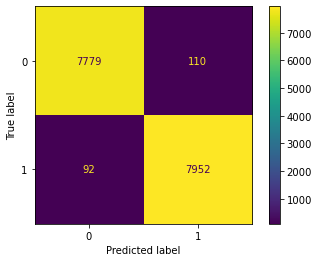

ExtraTreesClassifier: 
[[7868   21]
 [  52 7992]]


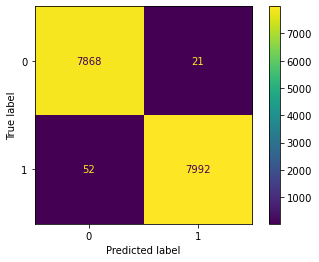

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    0.5s
[Parallel(n_jobs=4)]: Done 500 out of 500 | elapsed:    0.5s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s


RandomForestClassifier: 
[[7855   34]
 [  40 8004]]


[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    0.5s
[Parallel(n_jobs=4)]: Done 500 out of 500 | elapsed:    0.5s finished


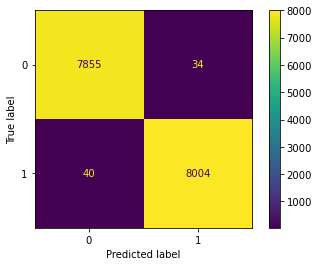

In [7]:
# split
train_features, test_features, train_labels, test_labels = train_test_split(X, y, test_size=0.30)
print('Train', train_features.shape, train_labels.shape, 'Test', test_features.shape, test_labels.shape)

#------------------------------------------------------------------------------------------------
train_features, train_labels  = mn.pre_processing(train_features, train_labels, 1)
test_features, test_labels    = mn.pre_processing(test_features, test_labels, 0 )

# get models
mn.get_models()

# get out of fold predictions
mn.get_out_of_fold_predictions(train_features, train_labels, test_features)
    

# evaluate base models
result = mn.evaluate_models(test_features, test_labels)


In [10]:
test = pd.DataFrame(test_features, columns = ['time', 'lat', 'lon', 'heading', 'velocity', 'baroaltitude', 'geoaltitude'])
test

,time,lat,lon,heading,velocity,baroaltitude,geoaltitude
0,-0.767536,-1.529237,0.294996,-0.385028,0.108299,-1.661855,0.699174
1,1.534959,0.388764,1.688577,-0.519291,0.699734,0.706696,0.703916
2,0.886453,0.891662,1.278873,-0.651840,0.643147,0.706696,0.689689
3,0.696065,0.965828,-0.327957,1.017838,-0.376623,-0.979226,-0.958219
4,-0.223148,0.954293,0.816058,-0.542390,0.614214,0.318010,0.315057
...,...,...,...,...,...,...,...
15928,0.410485,0.795051,1.071793,-0.542681,0.897096,1.289723,1.239782
15929,-1.118563,1.221184,0.275895,-0.636556,0.452616,-0.068245,-0.076173
15930,1.026268,0.970488,-1.030052,0.086268,-3.139088,-2.876496,-2.845608
15931,1.335647,0.503126,-0.264746,-0.917490,0.612908,-0.070675,-0.073802


In [ ]:

print("MODEL RESULTS: ")
for item in result:
    print(item)